In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "../data/landslide.csv"
df = pd.read_csv(file_path)

# Quick look
df.head()


,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [2]:
import sklearn
print(sklearn.__version__)


1.7.1


In [5]:
# Define target variable
df["fatal_label"] = (df["fatality_count"] > 0).astype(int)   # 1 = Fatal, 0 = Non-fatal

df[["fatality_count", "fatal_label"]].head(10)


,fatality_count,fatal_label
0,11.0,1
1,0.0,0
2,10.0,1
3,1.0,1
4,0.0,0
5,0.0,0
6,0.0,0
7,3.0,1
8,NaN,0
9,2.0,1


In [6]:
# Select features
features = ["landslide_trigger", "landslide_size", "landslide_setting", "country_name"]

X = df[features]
y = df["fatal_label"]

# Handle missing values
X = X.fillna("Unknown")

# Encode categorical variables
encoder = LabelEncoder()
for col in X.columns:
    X[col] = encoder.fit_transform(X[col].astype(str))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7988219302220209
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1719
           1       0.57      0.39      0.46       488

    accuracy                           0.80      2207
   macro avg       0.70      0.65      0.67      2207
weighted avg       0.78      0.80      0.78      2207



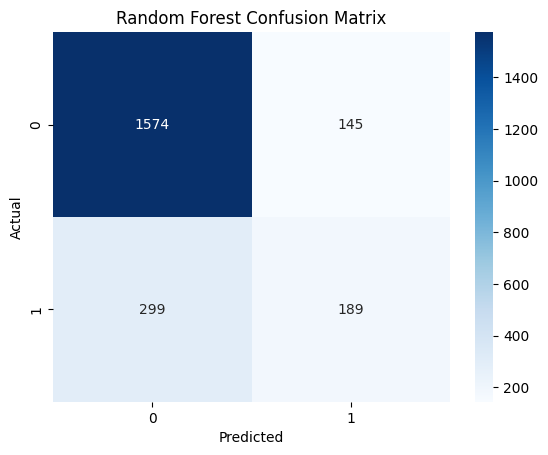

In [9]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7874943362029905
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1719
           1       0.69      0.07      0.13       488

    accuracy                           0.79      2207
   macro avg       0.74      0.53      0.50      2207
weighted avg       0.77      0.79      0.71      2207



In [11]:
from imblearn.over_sampling import SMOTE

# Features and target
X = df.drop(columns=["fatality_count", "fatal_label"])
y = df["fatal_label"]

# Encode categorical columns if any
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

# Train Random Forest on balanced data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_res, y_train_res)

# Predictions
y_pred_smote = rf_smote.predict(X_test)

# Evaluation
print("Random Forest (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest with SMOTE Confusion Matrix")
plt.show()


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [12]:
from sklearn.impute import SimpleImputer

# Fill NaN with mean of the column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())



c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['event_time']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['event_time']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Before SMOTE: fatal_label
0    6014
1    1709
Name: count, dtype: int64
After SMOTE: fatal_label
0    6014
1    6014
Name: count, dtype: int64


In [13]:
# ================================
# Feature Engineering
# ================================

# 1. Drop useless / leakage columns
drop_cols = ["event_time", "source_name", "source_link", "source_original"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# 2. Fill NaN values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")  # categorical -> Unknown
    else:
        df[col] = df[col].fillna(df[col].median())  # numeric -> median

# 3. Encode categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 4. Define features (X) and target (y)
X = df_encoded.drop("fatal_label", axis=1)
y = df_encoded["fatal_label"]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Check shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (7723, 48725)
Test shape: (3310, 48725)


In [14]:
# ================================
# Model Training with Engineered Features
# ================================

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Logistic Regression (use saga solver for large dataset)
log_reg = LogisticRegression(max_iter=2000, solver="saga", n_jobs=-1)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


KeyboardInterrupt: 

In [15]:
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)


In [16]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,       # limit tree depth
    min_samples_split=10,  # avoid very deep branches
    random_state=42,
    n_jobs=-1
)


In [17]:
X_small = X_train.sample(frac=0.3, random_state=42)
y_small = y_train.loc[X_small.index]

rf.fit(X_small, y_small)


,n_estimators,100
,criterion,'gini'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7785498489425982

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      2577
           1       0.00      0.00      0.00       733

    accuracy                           0.78      3310
   macro avg       0.39      0.50      0.44      3310
weighted avg       0.61      0.78      0.68      3310


Confusion Matrix:
 [[2577    0]
 [ 733    0]]


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


In [2]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load your dataset (replace with your CSV path)
df = pd.read_csv("landslide.csv")   # <-- update file name if different

# 3. Define target variable (example: fatal/non-fatal)
df["fatal_label"] = (df["fatality_count"] > 0).astype(int)

# 4. Drop unnecessary columns (IDs, text fields, etc.)
X = df.drop(columns=["fatality_count", "fatal_label"])
y = df["fatal_label"]

# 5. Handle categorical columns if needed
X = pd.get_dummies(X)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 7. Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 8. Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'landslide.csv'